**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear
from diive.core.plotting.heatmap_datetime import HeatmapDateTime, HeatmapYearMonth

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.5


# **Load data**

In [2]:
SOURCEDIR = r"../60_MERGE_DATA_FLUXES"
FILENAME = r"61.1_FLUXES_M10_MGMT_L4.1_NEE_LE_H_FN2O_FCH4.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
df

Loaded .parquet file ..\60_MERGE_DATA_FLUXES\61.1_FLUXES_M10_MGMT_L4.1_NEE_LE_H_FN2O_FCH4.parquet (0.770 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-12,.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-18,.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-24,.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-6,.SWC_GF1_0.15_1_gfXG_MEAN3H-12,.SWC_GF1_0.15_1_gfXG_MEAN3H-18,.SWC_GF1_0.15_1_gfXG_MEAN3H-24,.SWC_GF1_0.15_1_gfXG_MEAN3H-6,.TS_GF1_0.04_1_gfXG_MEAN3H-12,.TS_GF1_0.04_1_gfXG_MEAN3H-18,.TS_GF1_0.04_1_gfXG_MEAN3H-24,.TS_GF1_0.04_1_gfXG_MEAN3H-6,.TS_GF1_0.15_1_gfXG_MEAN3H-12,.TS_GF1_0.15_1_gfXG_MEAN3H-18,.TS_GF1_0.15_1_gfXG_MEAN3H-24,...,FCH4_L3.1_L3.3_CUT_50_QCF,FCH4_L3.1_L3.3_CUT_50_QCF0,FLAG_L3.3_CUT_84_FCH4_L3.1_USTAR_TEST,SUM_L3.3_CUT_84_FCH4_L3.1_HARDFLAGS,SUM_L3.3_CUT_84_FCH4_L3.1_SOFTFLAGS,SUM_L3.3_CUT_84_FCH4_L3.1_FLAGS,FLAG_L3.3_CUT_84_FCH4_L3.1_QCF,FCH4_L3.1_L3.3_CUT_84_QCF,FCH4_L3.1_L3.3_CUT_84_QCF0,FCH4_L3.1_L3.3_CUT_16_QCF_gfRF,FLAG_FCH4_L3.1_L3.3_CUT_16_QCF_gfRF_ISFILLED,FCH4_L3.1_L3.3_CUT_50_QCF_gfRF,FLAG_FCH4_L3.1_L3.3_CUT_50_QCF_gfRF_ISFILLED,FCH4_L3.1_L3.3_CUT_84_QCF_gfRF,FLAG_FCH4_L3.1_L3.3_CUT_84_QCF_gfRF_ISFILLED
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 21:45:00,0.0,0.0,0.0,0.0,52.229004,52.226300,52.226689,52.216796,3.458828,3.150402,3.115260,3.660897,4.335667,4.347764,4.385967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 22:15:00,0.0,0.0,0.0,0.0,52.227858,52.227986,52.224528,52.214211,3.522570,3.187638,3.103440,3.643396,4.338551,4.342880,4.379524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 22:45:00,0.0,0.0,0.0,0.0,52.226640,52.229837,52.222456,52.209876,3.578745,3.230037,3.095339,3.624025,4.343767,4.339440,4.372636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **List of gap-filled flux variables**

In [3]:
fluxlist = [c for c in df.columns if str(c).endswith("gfRF")];
fluxlist

['NEE_L3.1_L3.3_CUT_16_QCF_gfRF',
 'NEE_L3.1_L3.3_CUT_50_QCF_gfRF',
 'NEE_L3.1_L3.3_CUT_84_QCF_gfRF',
 'LE_L3.1_L3.3_CUT_NONE_QCF_gfRF',
 'H_L3.1_L3.3_CUT_NONE_QCF_gfRF',
 'FN2O_L3.1_L3.3_CUT_16_QCF_gfRF',
 'FN2O_L3.1_L3.3_CUT_50_QCF_gfRF',
 'FN2O_L3.1_L3.3_CUT_84_QCF_gfRF',
 'FCH4_L3.1_L3.3_CUT_16_QCF_gfRF',
 'FCH4_L3.1_L3.3_CUT_50_QCF_gfRF',
 'FCH4_L3.1_L3.3_CUT_84_QCF_gfRF']

# **Fluxes: gap-filled** (random forest)

## Main ecosystem fluxes

In [4]:
nee = 'NEE_L3.1_L3.3_CUT_50_QCF_gfRF'
le = 'LE_L3.1_L3.3_CUT_NONE_QCF_gfRF'
h = 'H_L3.1_L3.3_CUT_NONE_QCF_gfRF'
n2o = 'FN2O_L3.1_L3.3_CUT_50_QCF_gfRF'
ch4 = 'FCH4_L3.1_L3.3_CUT_50_QCF_gfRF'
fluxes = [nee, le, h, n2o, ch4]
fluxes

['NEE_L3.1_L3.3_CUT_50_QCF_gfRF',
 'LE_L3.1_L3.3_CUT_NONE_QCF_gfRF',
 'H_L3.1_L3.3_CUT_NONE_QCF_gfRF',
 'FN2O_L3.1_L3.3_CUT_50_QCF_gfRF',
 'FCH4_L3.1_L3.3_CUT_50_QCF_gfRF']

## Heatmaps (half-hourly fluxes)

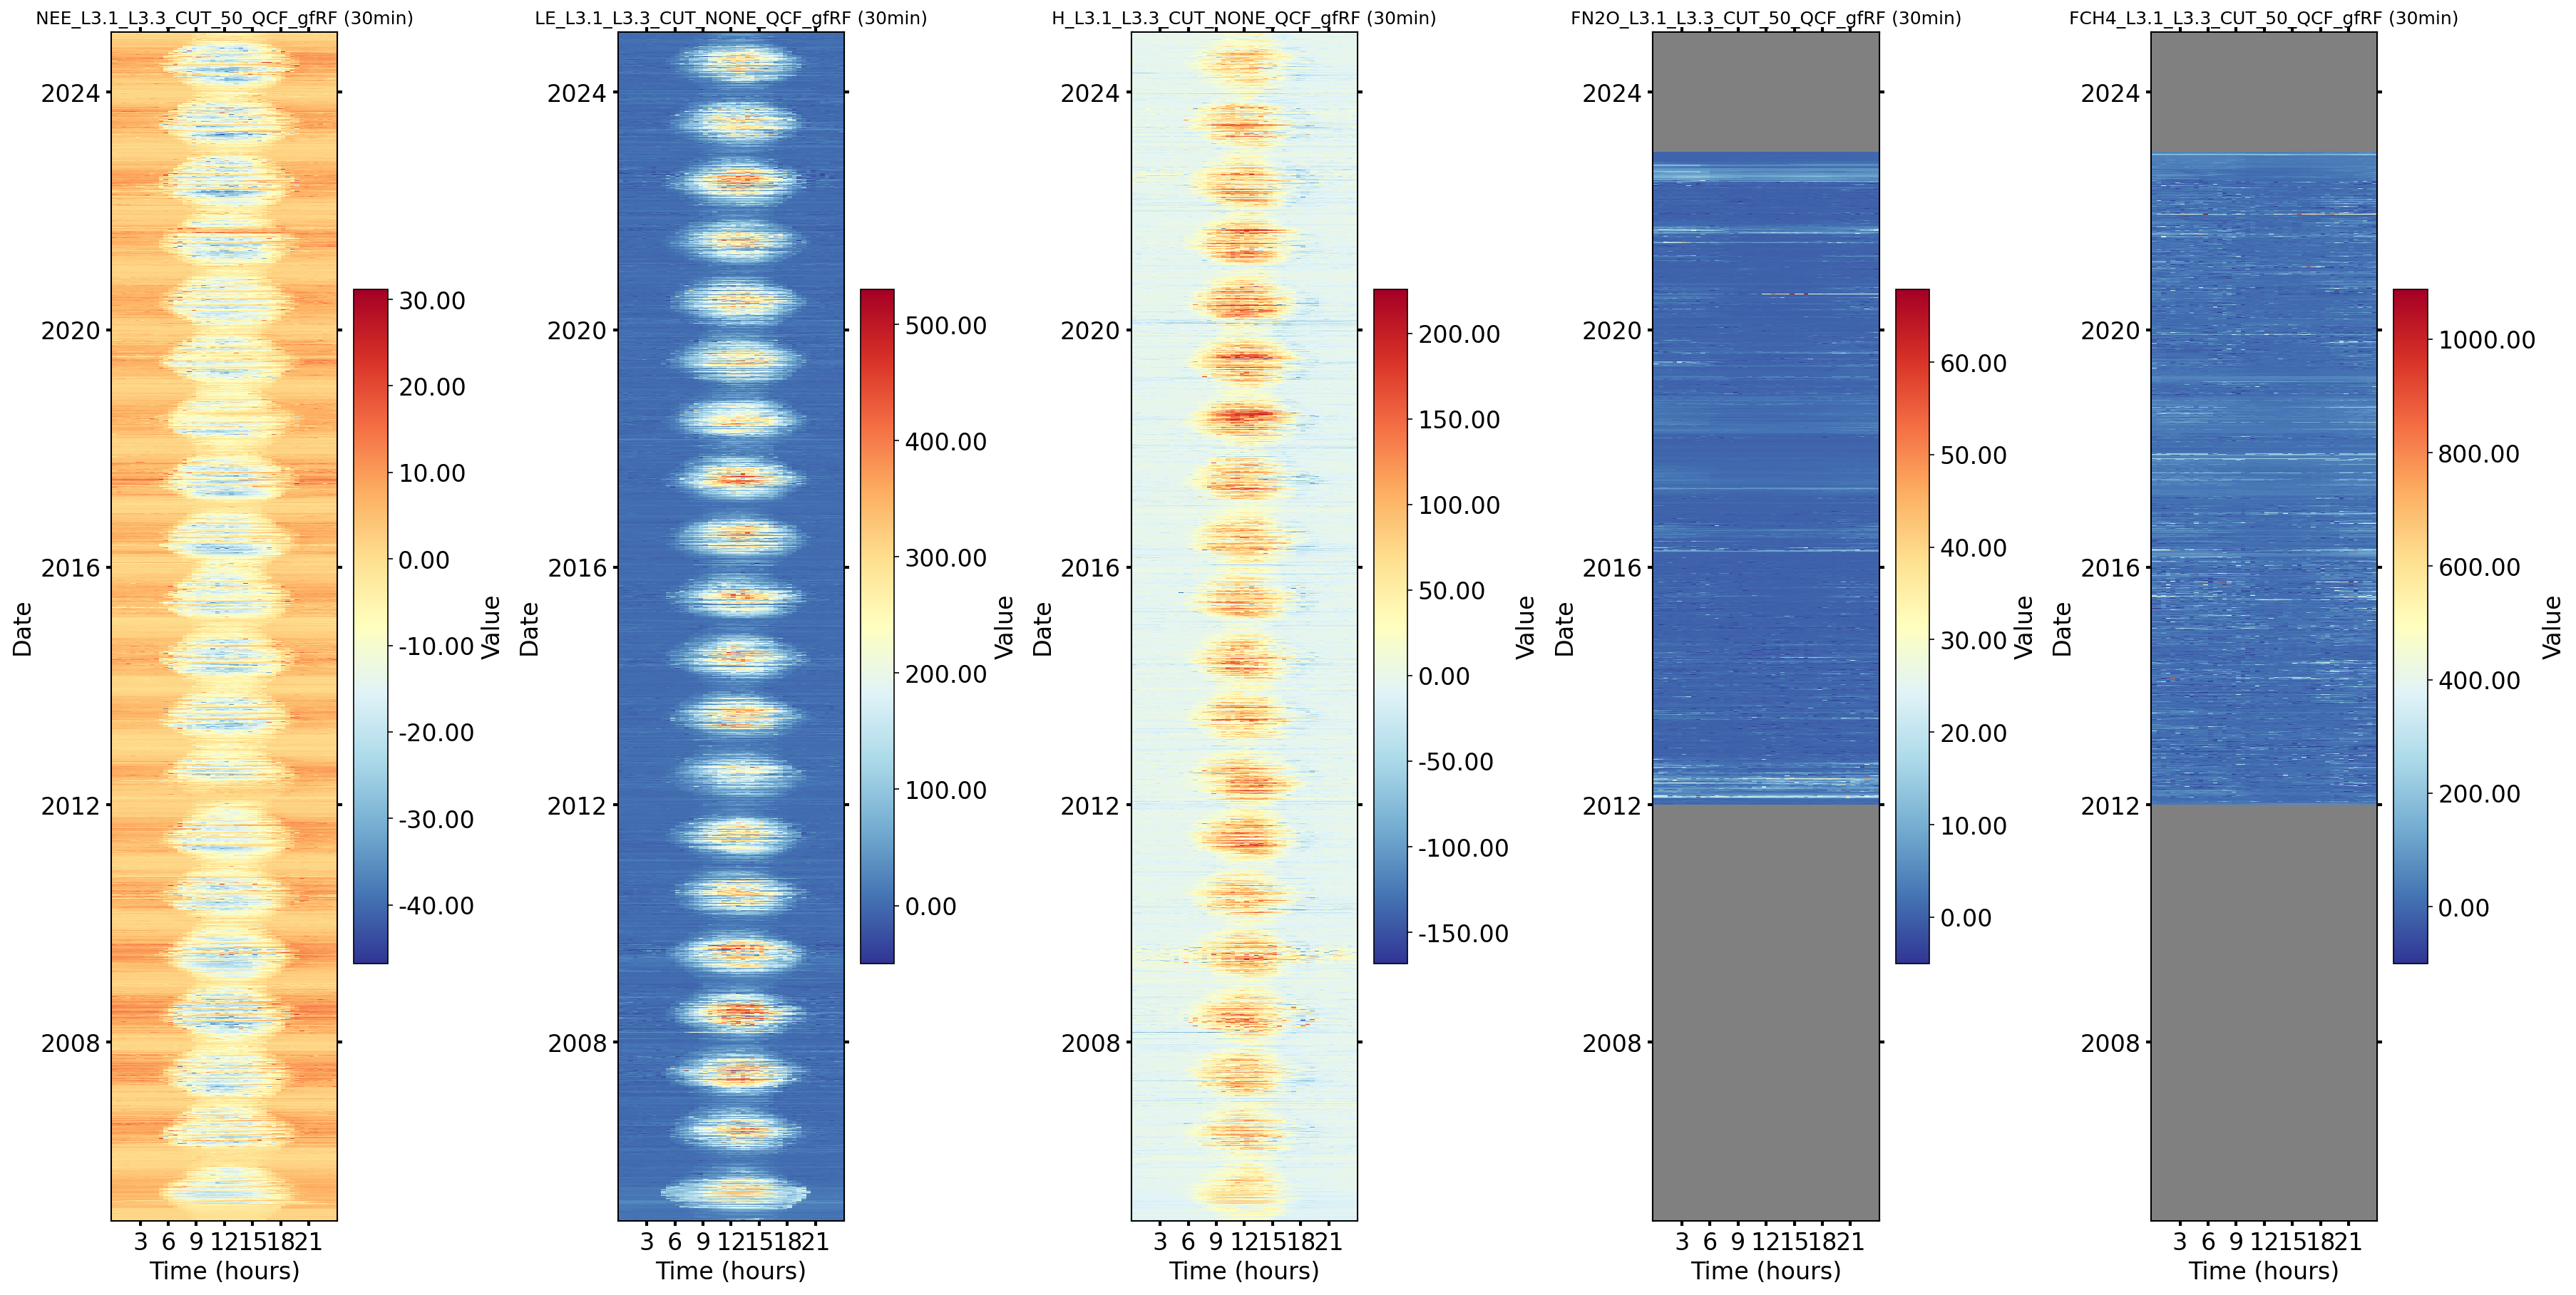

In [5]:
fig, axs = plt.subplots(ncols=5, figsize=(24, 12), dpi=150, layout="constrained")
HeatmapDateTime(series=df[nee], ax=axs[0]).plot()
HeatmapDateTime(series=df[le], ax=axs[1]).plot()
HeatmapDateTime(series=df[h], ax=axs[2]).plot()
HeatmapDateTime(series=df[n2o], ax=axs[3]).plot()
HeatmapDateTime(series=df[ch4], ax=axs[4]).plot()

## Heatmaps (monthly fluxes)

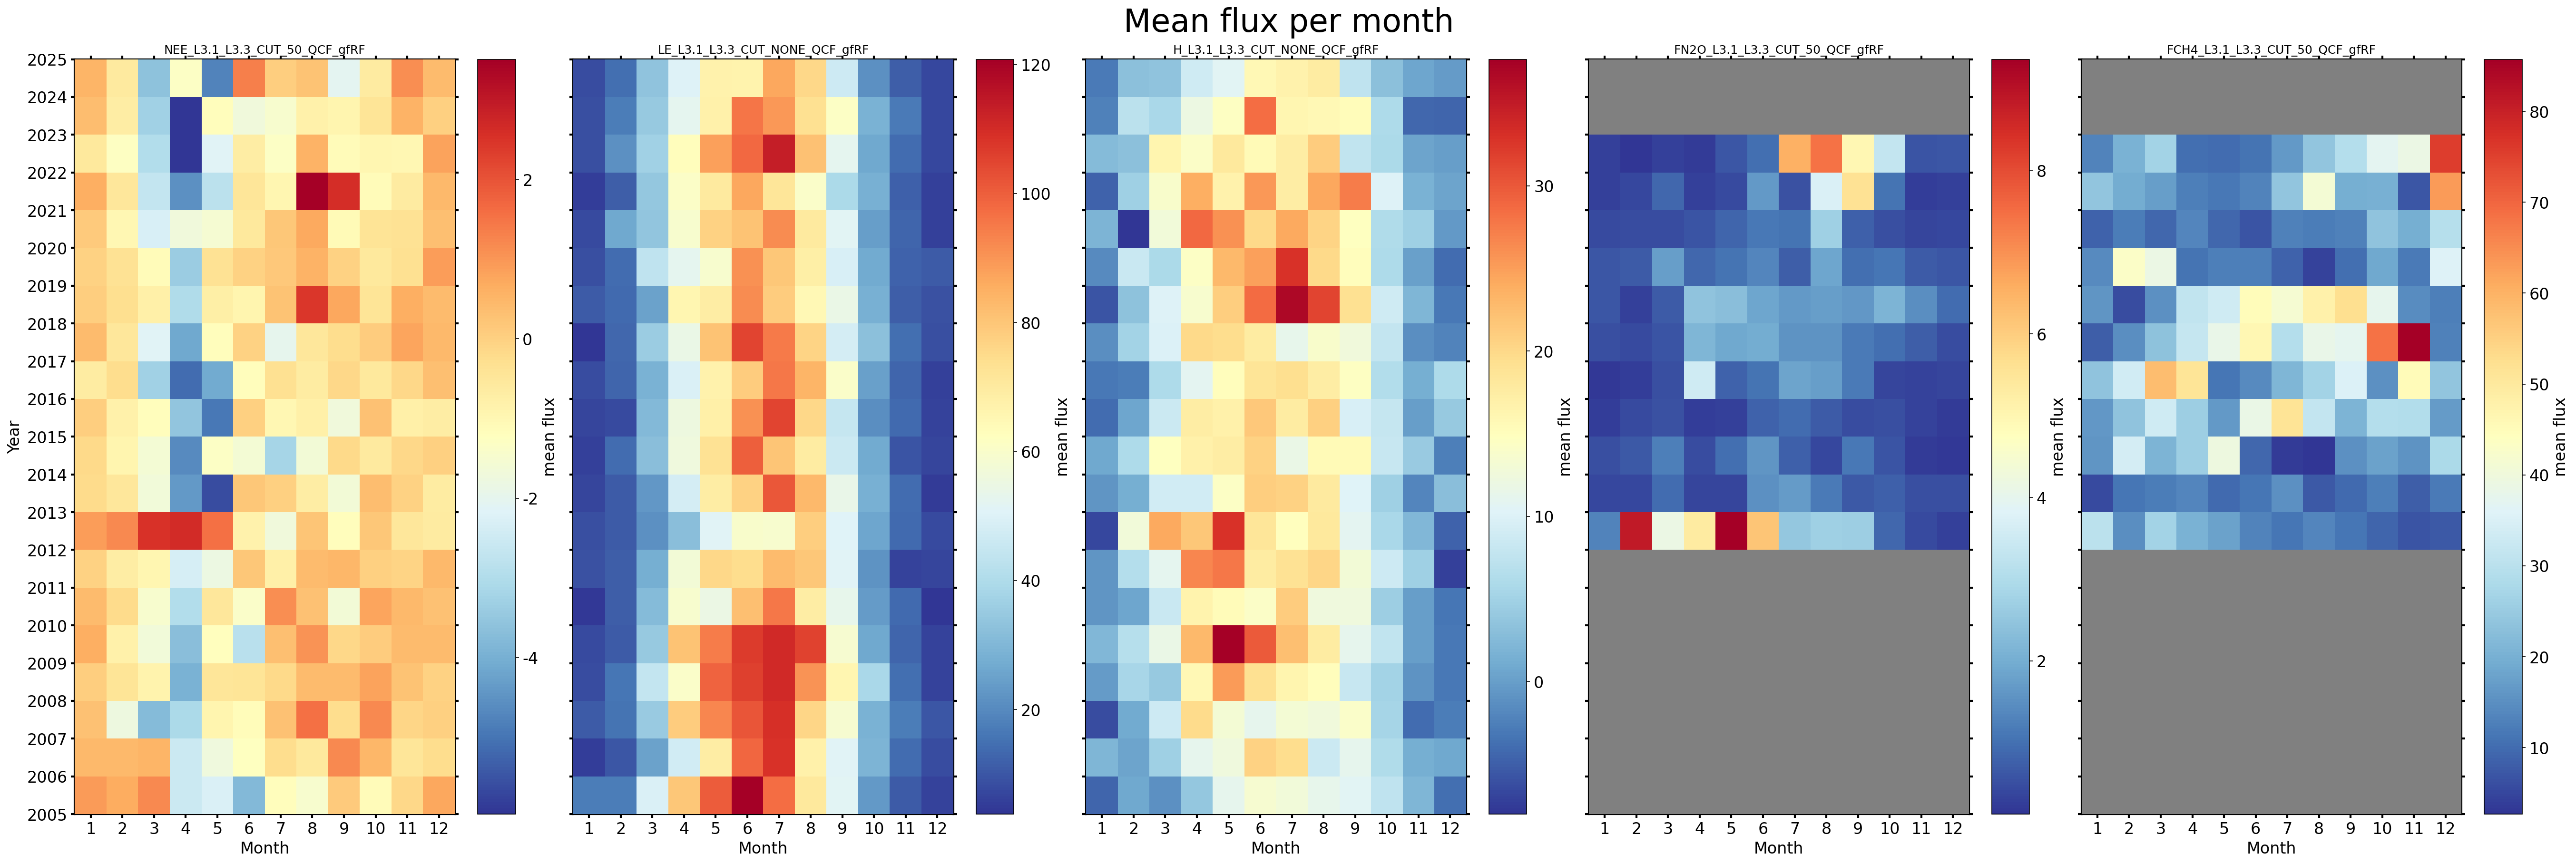

In [12]:
fig, axs = plt.subplots(ncols=5, figsize=(36, 12), dpi=150, layout="constrained")
fig.suptitle(f'Mean flux per month', fontsize=32)

for ix, f in enumerate(fluxes):
    s = df[f].resample('M').mean()        
    HeatmapYearMonth(series_monthly=s, title=s.name, ax=axs[ix], cb_digits_after_comma=0, zlabel="mean flux").plot()

# axs[0].axes.get_yaxis().get_label().set_visible(False)
hide_labels = [1, 2, 3, 4]
for h in hide_labels:
    axs[h].axes.get_yaxis().get_label().set_visible(False)
    plt.setp(axs[h].get_yticklabels(), visible=False)

## Cumulatives per year

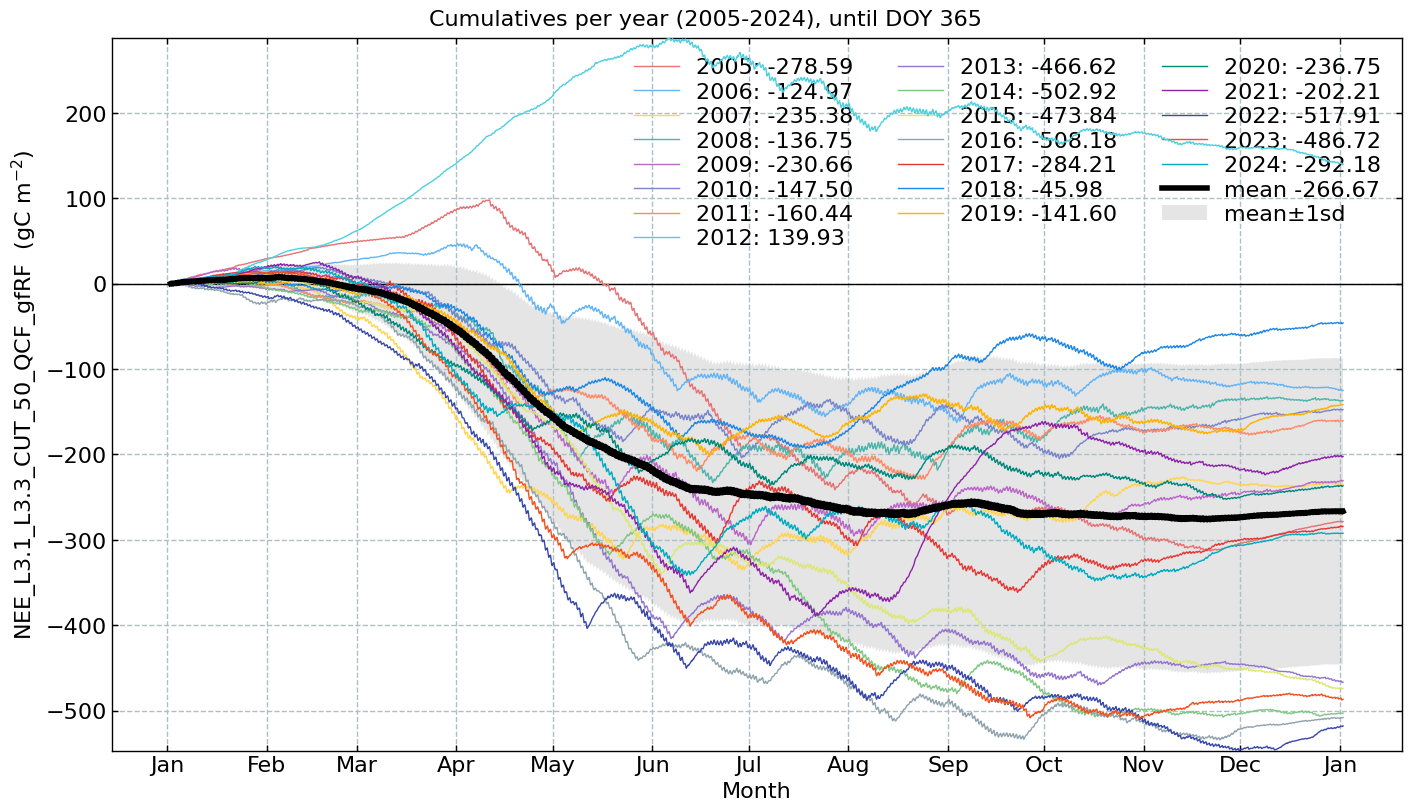

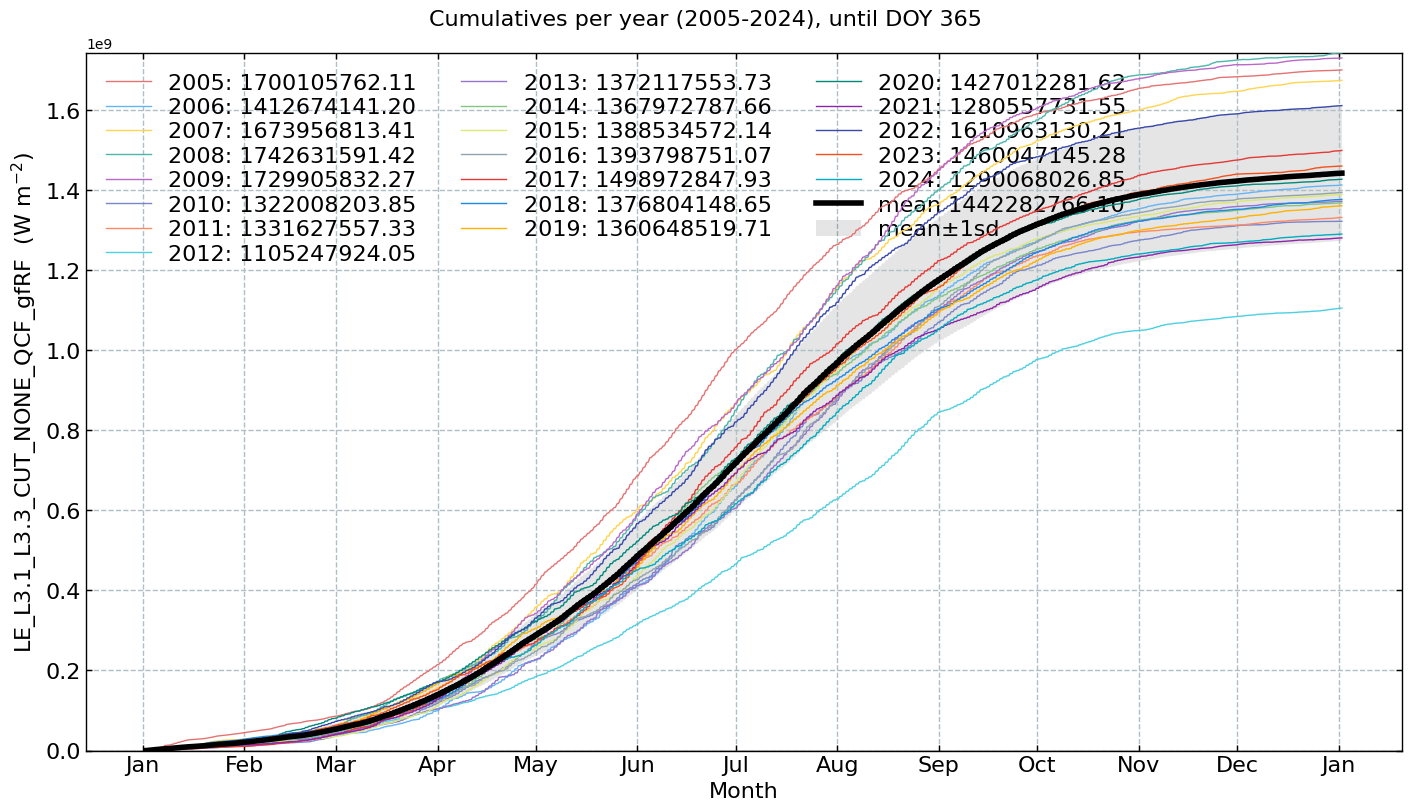

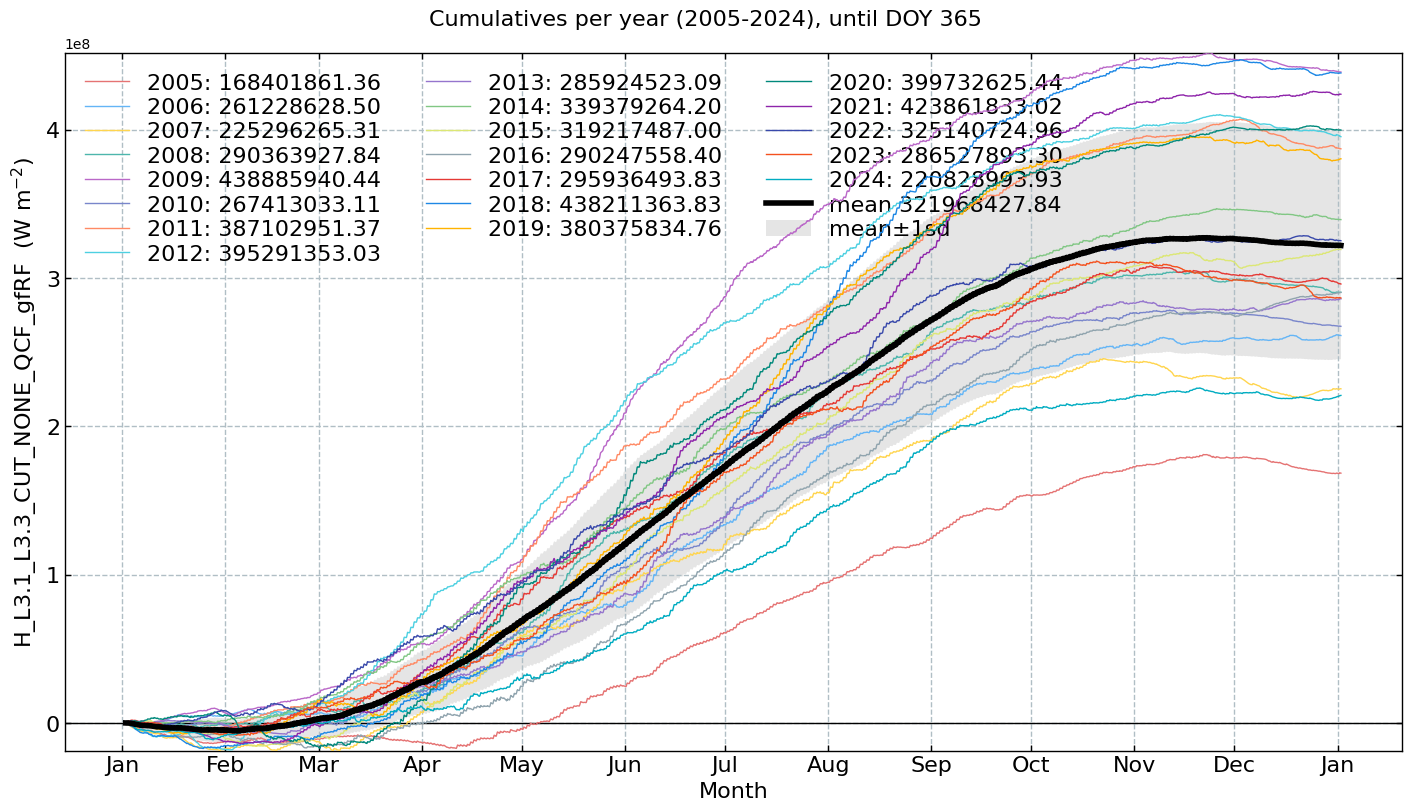

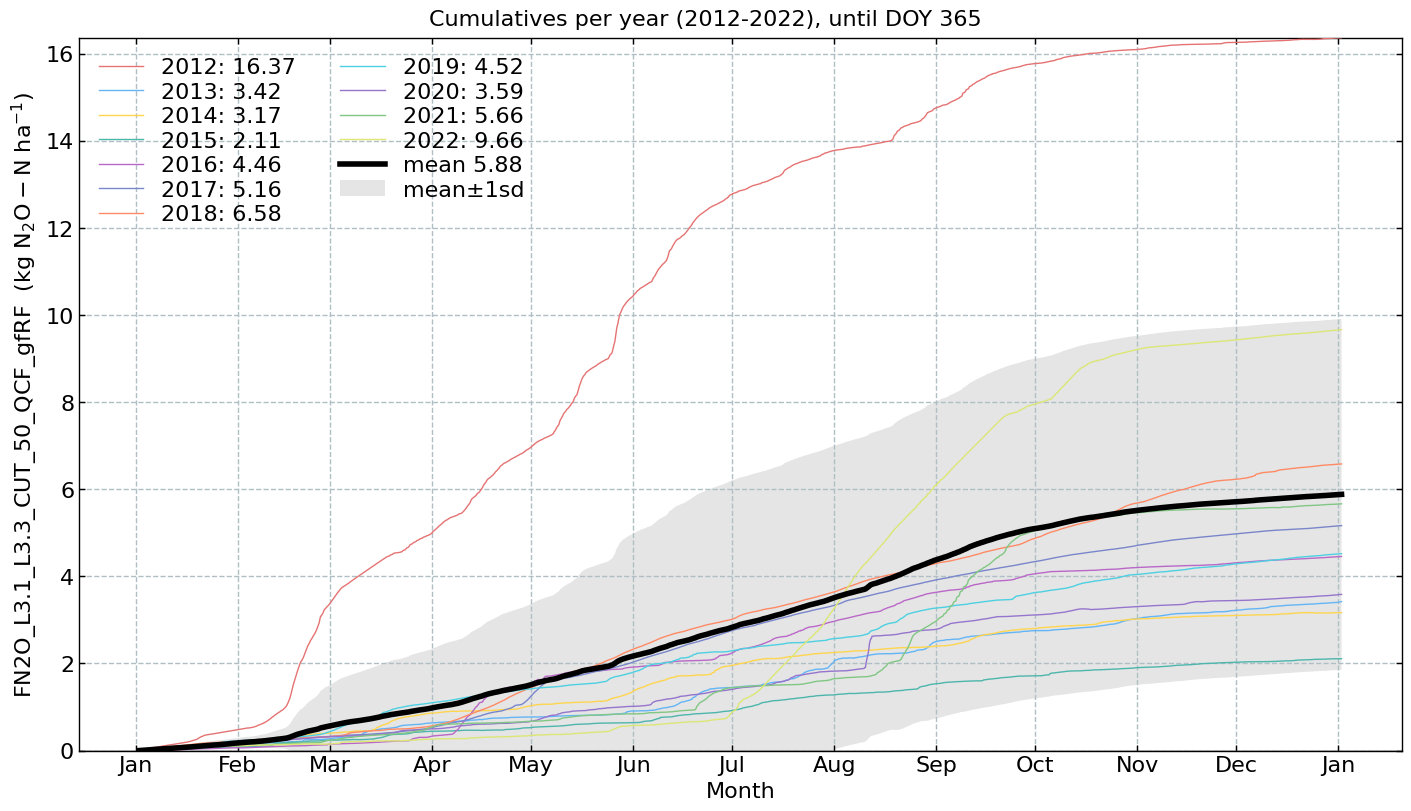

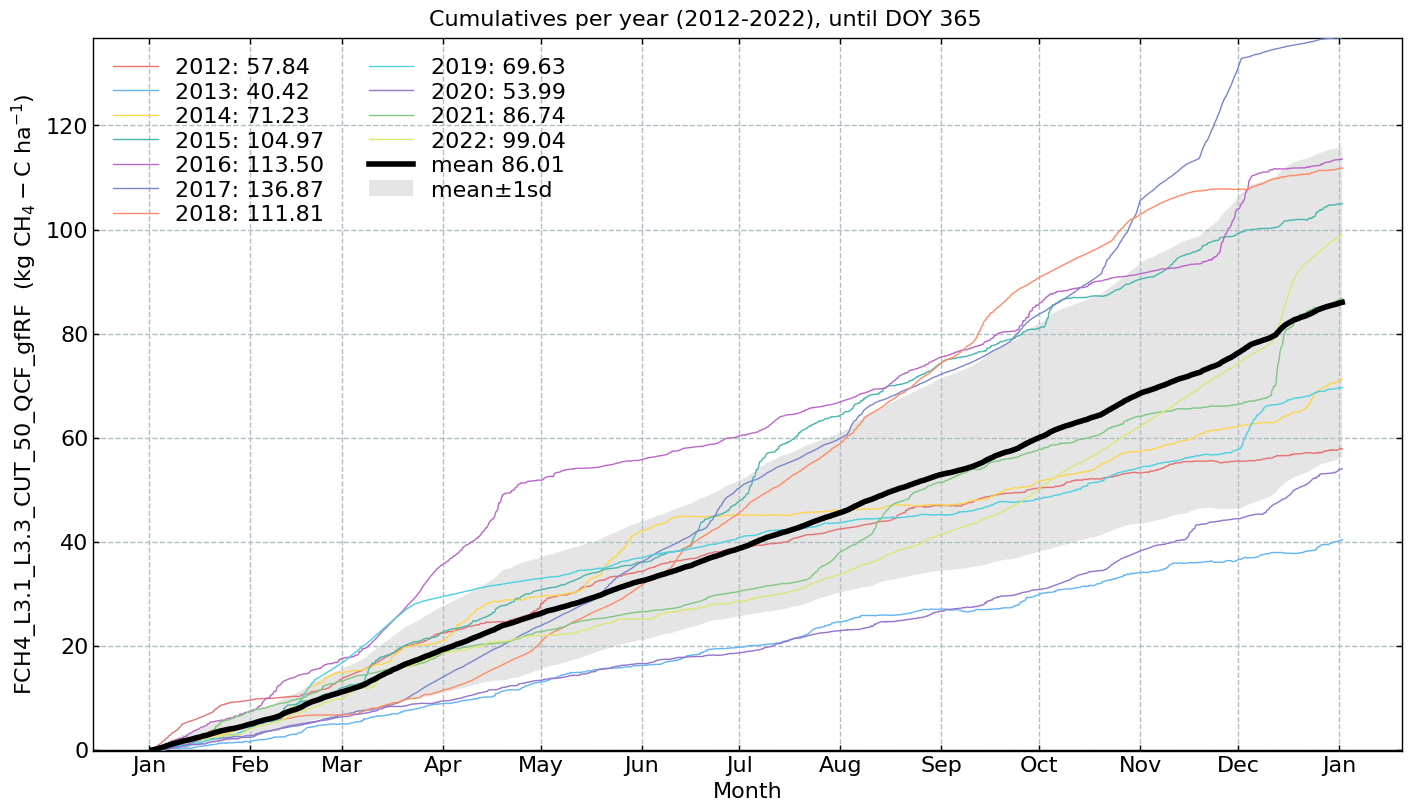

In [7]:
# Conversion factors and resulting units
conversions = {
    'NEE_L3.1_L3.3_CUT_50_QCF_gfRF': [0.02161926, r'($\mathrm{gC\ m^{-2}}$)'],  # umol CO2 m-2 s-1 --> gC m-2 yr-1
    'LE_L3.1_L3.3_CUT_NONE_QCF_gfRF': [1800, r'($\mathrm{W\ m^{-2}}$)'],  # W m-2 s-1 --> W m-2 yr-1
    'H_L3.1_L3.3_CUT_NONE_QCF_gfRF': [1800, r'($\mathrm{W\ m^{-2}}$)'],  # W m-2 s-1 --> W m-2 yr-1
    'FN2O_L3.1_L3.3_CUT_50_QCF_gfRF': [0.0002521206, r'($\mathrm{kg\ N_2O-N\ ha^{-1}}$)'],  # nmol N2O m-2 s-1 --> kg N2O-N ha-1 yr-1
    'FCH4_L3.1_L3.3_CUT_50_QCF_gfRF': [0.000216198, r'($\mathrm{kg\ CH_4-C\ ha^{-1}}$)']  # nmol CH4 m-2 s-1 --> kg CH4-C ha-1 yr-1
}

for f in fluxes:
    s = df[f].multiply(conversions[f][0])
    units = conversions[f][1]

    CumulativeYear(
        series=s,
        series_units=units,
        start_year=2005,
        end_year=2024,
        show_reference=True,
        excl_years_from_reference=None,
        highlight_year=None,
        highlight_year_color='#F44336').plot();

# **End of notebook**

In [8]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-02-08 15:33:49
